<a href="https://colab.research.google.com/github/Kushagra3219/SNA/blob/main/Epidemic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

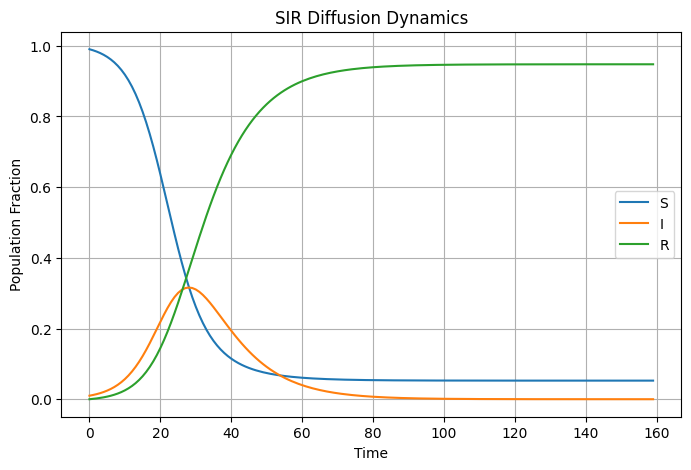

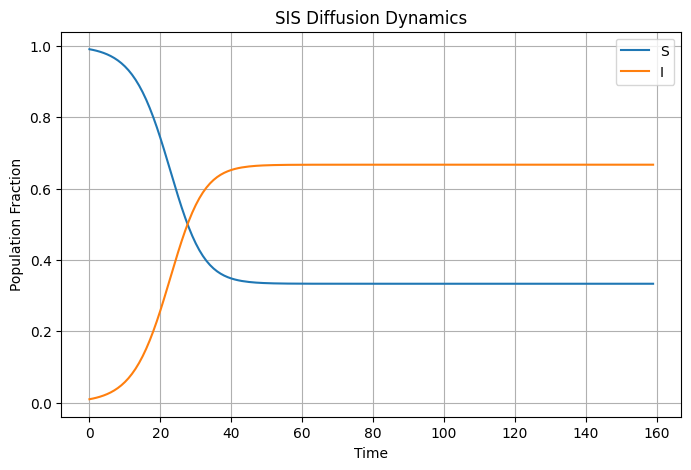

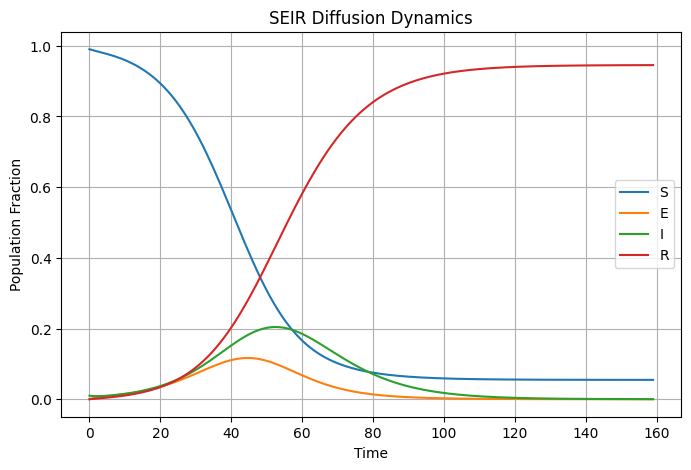

In [2]:
# 6. Simulate diffusion trends for different epidemic models and present results using
# appropriate visuals.


# ===========================================================
# Q6: Epidemic Diffusion Simulation (SIR, SIS, SEIR)
# ===========================================================


import numpy as np
import matplotlib.pyplot as plt
# -----------------------------------------------------------
# Helper function for plotting
# -----------------------------------------------------------
def plot_trends(time, data, labels, title):
   plt.figure(figsize=(8,5))
   for d, label in zip(data, labels):
       plt.plot(time, d, label=label)
   plt.xlabel("Time")
   plt.ylabel("Population Fraction")
   plt.title(title)
   plt.legend()
   plt.grid(True)
   plt.show()
# -----------------------------------------------------------
# Common parameters
# -----------------------------------------------------------
beta = 0.3      # infection rate
delta = 0.1     # recovery rate
sigma = 0.2     # rate from Exposed → Infected (SEIR)


T = 160         # number of time steps
time = np.arange(T)


# Initial conditions (fractions)
S0 = 0.99
I0 = 0.01
E0 = 0.0
R0 = 0.0
# ===========================================================
# ------------------------- SIR ------------------------------
# ===========================================================


S, I, R = [S0], [I0], [R0]


for t in range(1, T):
   S_new = S[-1] - beta * S[-1] * I[-1]
   I_new = I[-1] + beta * S[-1] * I[-1] - delta * I[-1]
   R_new = R[-1] + delta * I[-1]


   S.append(S_new)
   I.append(I_new)
   R.append(R_new)


plot_trends(time, [S, I, R], ["S", "I", "R"], "SIR Diffusion Dynamics")
# ===========================================================
# ------------------------- SIS ------------------------------
# ===========================================================


S_sis, I_sis = [S0], [I0]


for t in range(1, T):
   S_new = S_sis[-1] - beta * S_sis[-1] * I_sis[-1] + delta * I_sis[-1]
   I_new = 1 - S_new   # since S + I = 1


   S_sis.append(S_new)
   I_sis.append(I_new)


plot_trends(time, [S_sis, I_sis], ["S", "I"], "SIS Diffusion Dynamics")
# ===========================================================
# ------------------------- SEIR -----------------------------
# ===========================================================


S_e, E_e, I_e, R_e = [S0], [E0], [I0], [R0]


for t in range(1, T):
   S_new = S_e[-1] - beta * S_e[-1] * I_e[-1]
   E_new = E_e[-1] + beta * S_e[-1] * I_e[-1] - sigma * E_e[-1]
   I_new = I_e[-1] + sigma * E_e[-1] - delta * I_e[-1]
   R_new = R_e[-1] + delta * I_e[-1]


   S_e.append(S_new)
   E_e.append(E_new)
   I_e.append(I_new)
   R_e.append(R_new)


plot_trends(time, [S_e, E_e, I_e, R_e], ["S", "E", "I", "R"], "SEIR Diffusion Dynamics")